# GTSC2143 Machine Learning for Business
## Tutorial 3: Data Visualization with Matplotlib and Seaborn

---

## Activity 1. Data Preparation

### 1. Load the Dataset

In [2]:
# a) Load the Superstore Sales Dataset using pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style for consistency
sns.set_style("whitegrid")

df = pd.read_csv("https://raw.githubusercontent.com/WuCandice/Superstore-Sales-Analysis/refs/heads/main/dataset/Superstore%20Dataset.csv")

### b) Display basic information

In [3]:
# Dataset shape
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (9994, 20)


In [4]:
# First 5 rows
print("\nFirst 5 rows:")
display(df.head())


First 5 rows:


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,CA-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [5]:
# Column names and data types
print("\nColumn names and data types:")
df.info()


Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 no

### c) Check for any missing values in the dataset

In [6]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


**Observation:** The dataset has no missing values, which simplifies the data preparation process.

---

## Activity 2. Basic Matplotlib Visualizations

### 1. Histogram of Sales

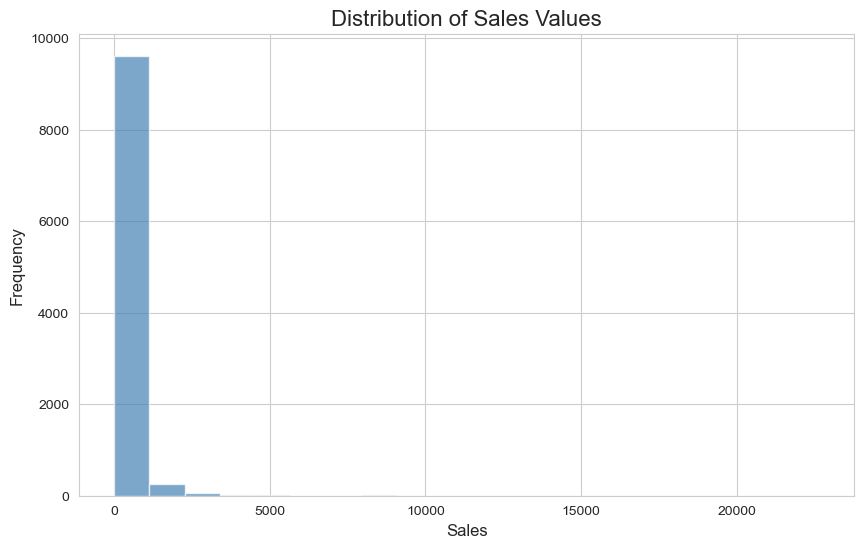

In [7]:
# a) Create a histogram of the 'Sales' column
plt.figure(figsize=(10, 6))
plt.hist(df['Sales'], bins=20, color='steelblue', alpha=0.7)
plt.title('Distribution of Sales Values', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#### b) Analysis
The histogram shows that the distribution of sales is heavily right-skewed. The vast majority of sales are of low value (typically under $2,500), with very few high-value transactions. This is a common pattern in retail datasets, where small, frequent purchases dominate.

### 2. Box Plot of Profit by Category

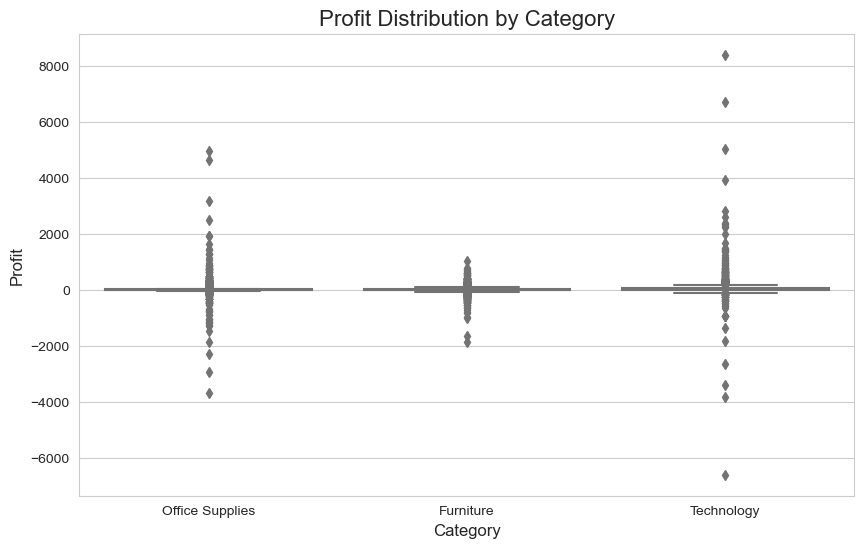

In [9]:
# a) Create a box plot comparing 'Profit' across different 'Category' values
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Profit', data=df, color='lightgreen')
plt.title('Profit Distribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.show()

#### b) Analysis
The box plot reveals that the 'Technology' category has the widest profit distribution, with the potential for both the highest profits and significant losses. 'Office Supplies' has a more compact distribution with a lower median profit. 'Furniture' shows the narrowest interquartile range and a median profit close to zero, indicating lower profitability and consistency compared to the other categories.

### 3. Scatter Plot of Sales vs Profit

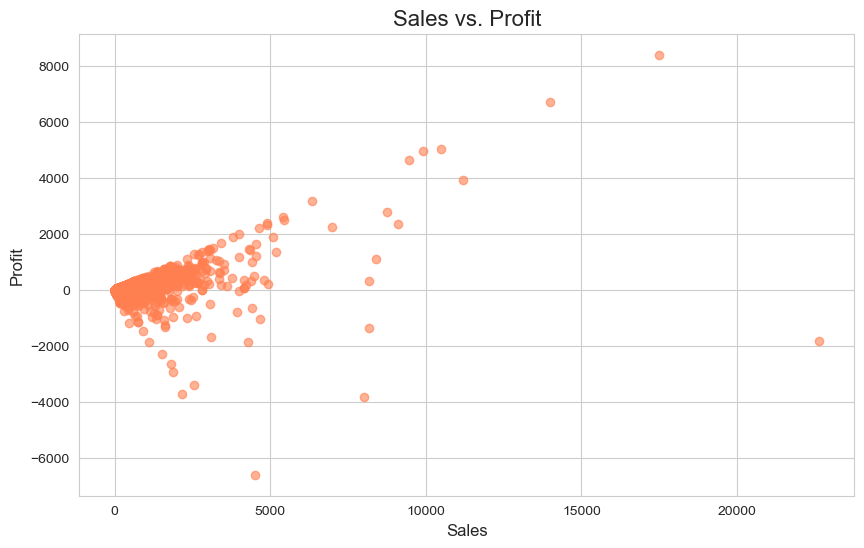

In [10]:
# a) Create a scatter plot of Sales vs Profit
plt.figure(figsize=(10, 6))
plt.scatter(x=df['Sales'], y=df['Profit'], color='coral', alpha=0.6)
plt.title('Sales vs. Profit', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.show()

#### b) Analysis
The scatter plot shows a general positive correlation between sales and profit, as expected; higher sales transactions tend to yield higher profits. However, the relationship is not perfectly linear, and there is significant variance. Notably, there are several instances of high-sales transactions that result in low or even negative profits, suggesting issues with margin or discounts on certain products.

### 4. Bar Chart of Total Sales by Region

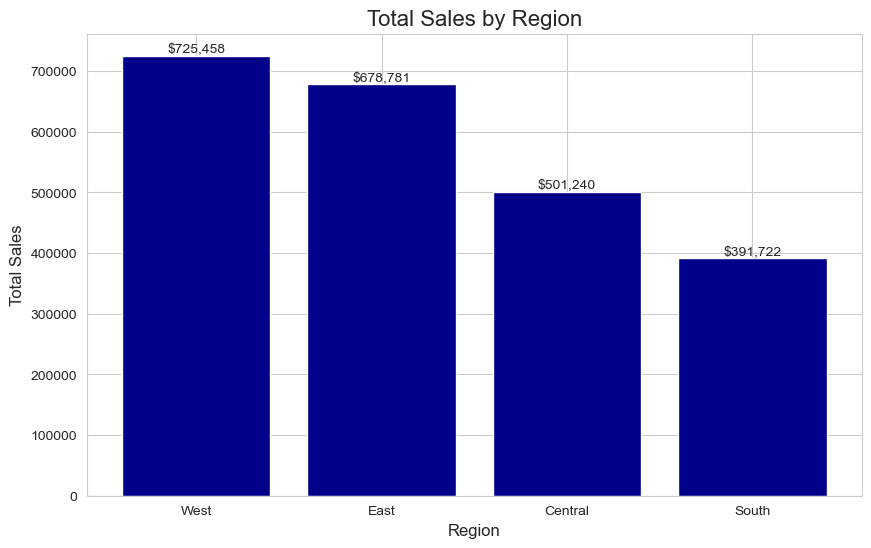

In [11]:
# a) Group the data by 'Region' and calculate total sales
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).reset_index()

# b) Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(region_sales['Region'], region_sales['Sales'], color='darkblue')
plt.title('Total Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# c) Display values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'${yval:,.0f}', va='bottom', ha='center') # va: vertical alignment

plt.show()

#### c) Analysis
The bar chart clearly indicates that the West and East regions are the top performers in terms of total sales, both exceeding $700,000. The Central region follows, while the South region has the lowest total sales, approximately $300,000 less than the leading regions. This suggests that marketing and sales efforts might be more effective or concentrated in the West and East.

---

## Activity 3. Advanced Matplotlib Visualizations

### 1. Multi-Panel Figure (2x2 Subplots)

/var/folders/w2/jm4sr6hx73bdcs3t0f0d0x9h0000gn/T/ipykernel_19206/3471088552.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', data=region_sales, ax=axes[1, 1], color='darkblue', estimator=sum, ci=None)


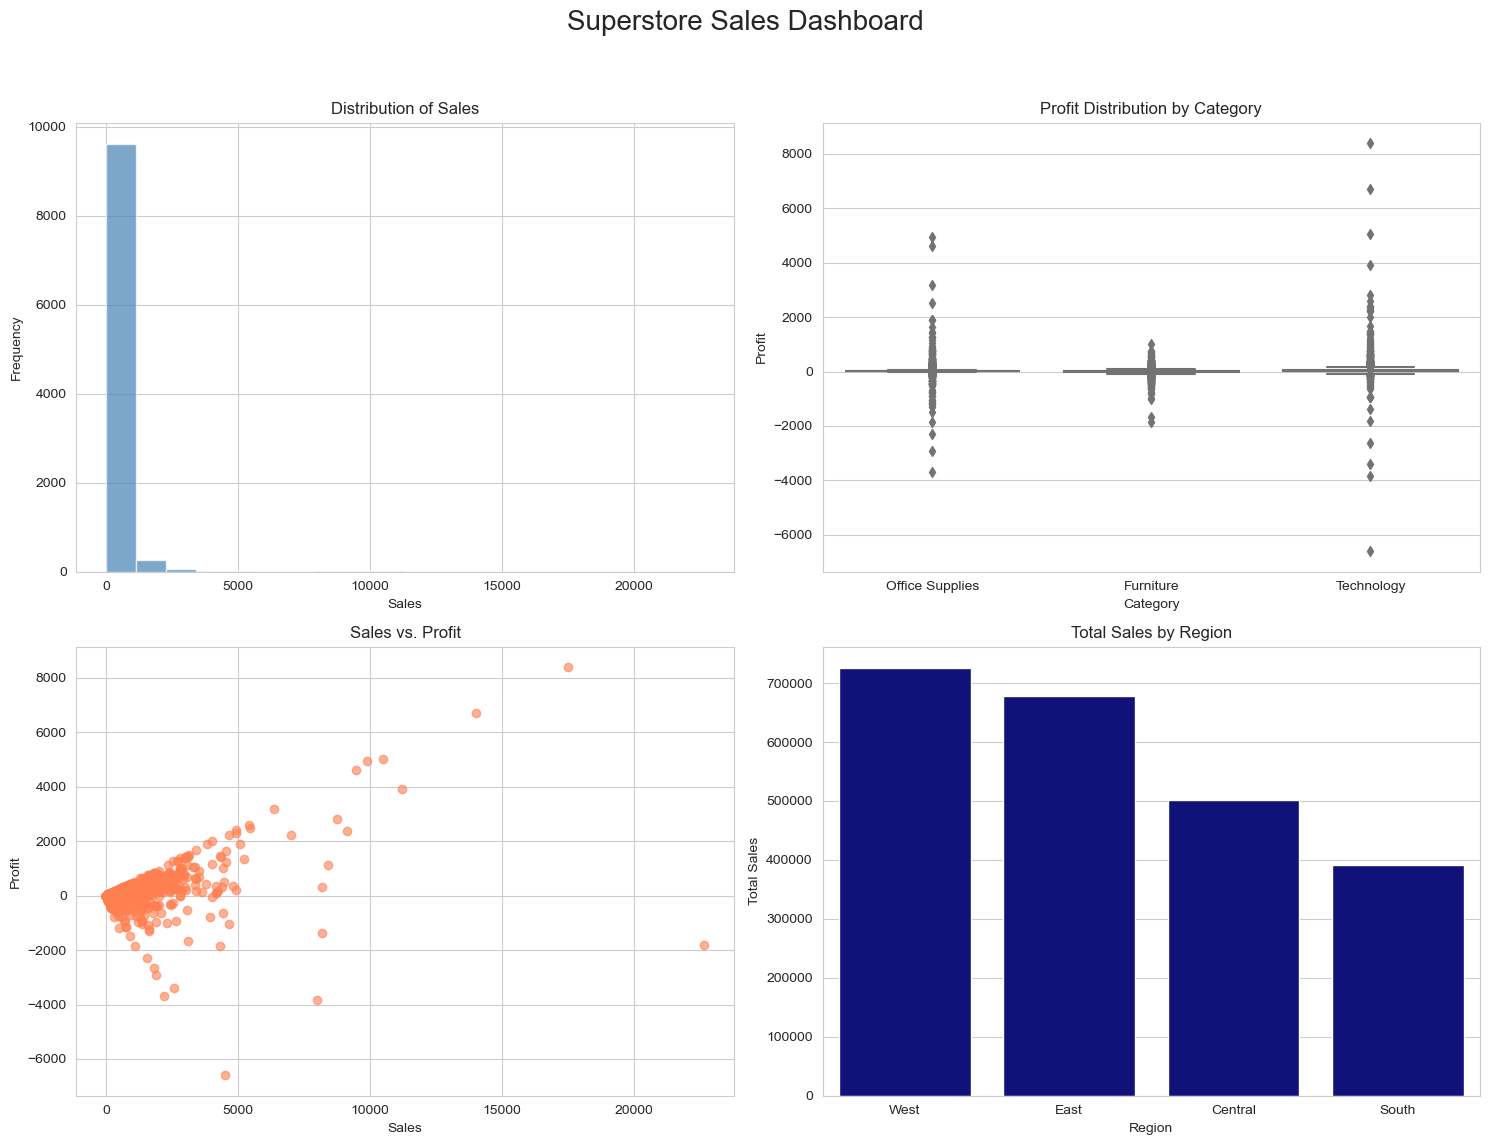

In [12]:
# a) Create a figure with 2x2 subplots containing all four visualizations from Activity 2
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# c) Add a main title for the entire figure
fig.suptitle('Superstore Sales Dashboard', fontsize=20)

# Plot 1: Histogram of Sales
axes[0, 0].hist(df['Sales'], bins=20, color='steelblue', alpha=0.7)
axes[0, 0].set_title('Distribution of Sales')
axes[0, 0].set_xlabel('Sales')
axes[0, 0].set_ylabel('Frequency')

# Plot 2: Box Plot of Profit by Category
sns.boxplot(x='Category', y='Profit', data=df, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Profit Distribution by Category')
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Profit')

# Plot 3: Scatter Plot of Sales vs Profit
axes[1, 0].scatter(x=df['Sales'], y=df['Profit'], color='coral', alpha=0.6)
axes[1, 0].set_title('Sales vs. Profit')
axes[1, 0].set_xlabel('Sales')
axes[1, 0].set_ylabel('Profit')

# Plot 4: Bar Chart of Total Sales by Region
sns.barplot(x='Region', y='Sales', data=region_sales, ax=axes[1, 1], color='darkblue', estimator=sum, ci=None)
axes[1, 1].set_title('Total Sales by Region')
axes[1, 1].set_xlabel('Region')
axes[1, 1].set_ylabel('Total Sales')

# b) Apply tight layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle
plt.show()

### 2. Customization Practice

#### a) Modify the scatter plot

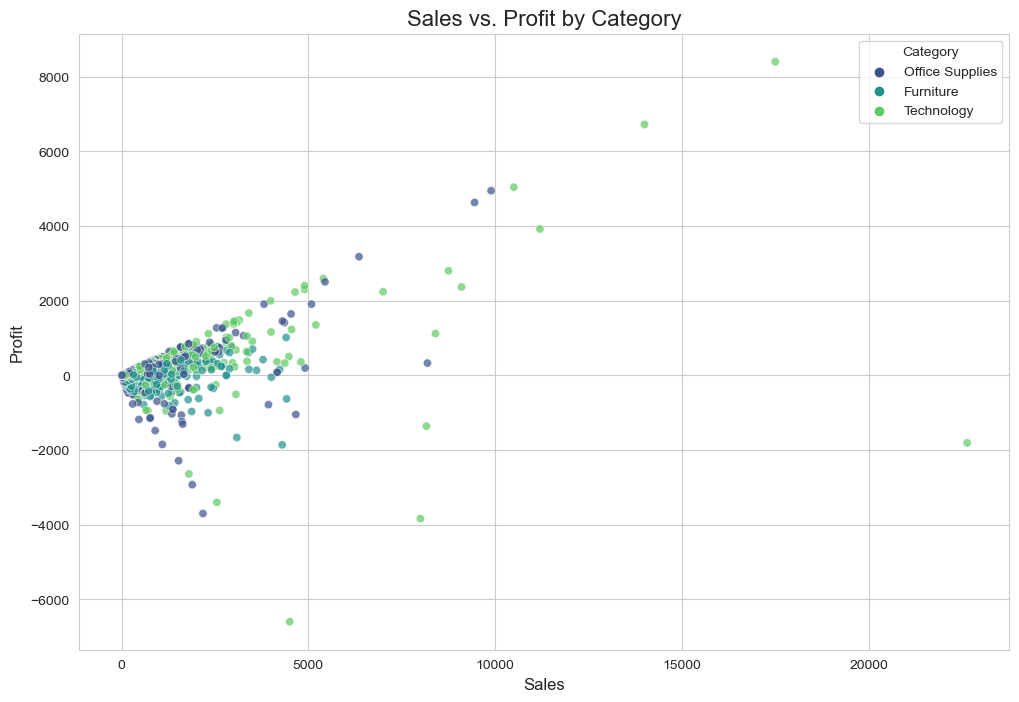

In [13]:
# Using Seaborn for easy coloring by category and automatic legend creation
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', palette='viridis', alpha=0.7)

plt.title('Sales vs. Profit by Category', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.legend(title='Category')
plt.grid(True) # Add grid lines
plt.show()

#### b) Enhance the bar chart

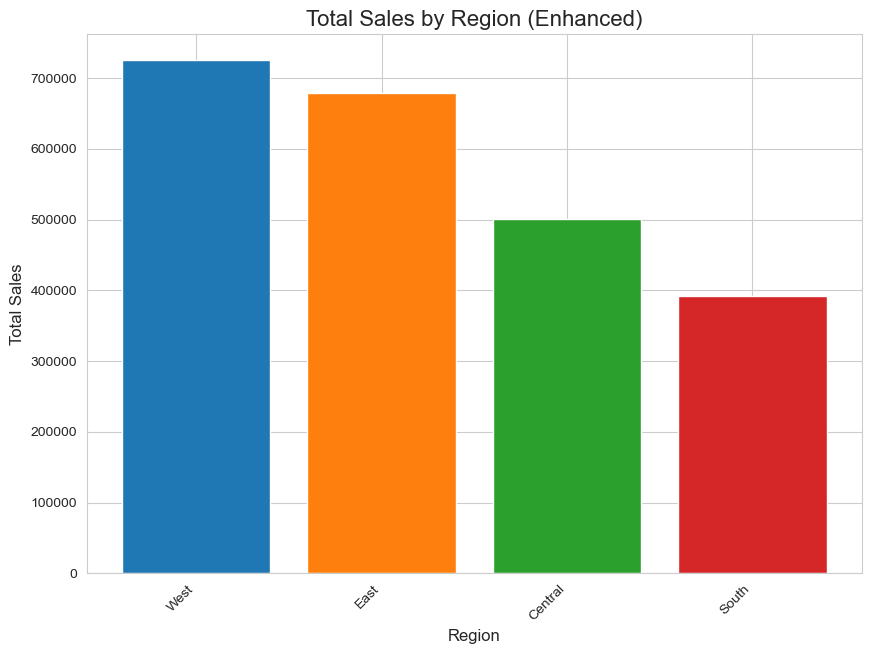

In [14]:
plt.figure(figsize=(10, 7))

# Define different colors for each region
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

bars = plt.bar(region_sales['Region'], region_sales['Sales'], color=colors)

plt.title('Total Sales by Region (Enhanced)', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Rotate x-axis labels for better readability if needed (good practice)
plt.xticks(rotation=45, ha='right')

plt.show()

---

## Activity 4. Seaborn Visualizations

### 1. Advanced Statistical Plots

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

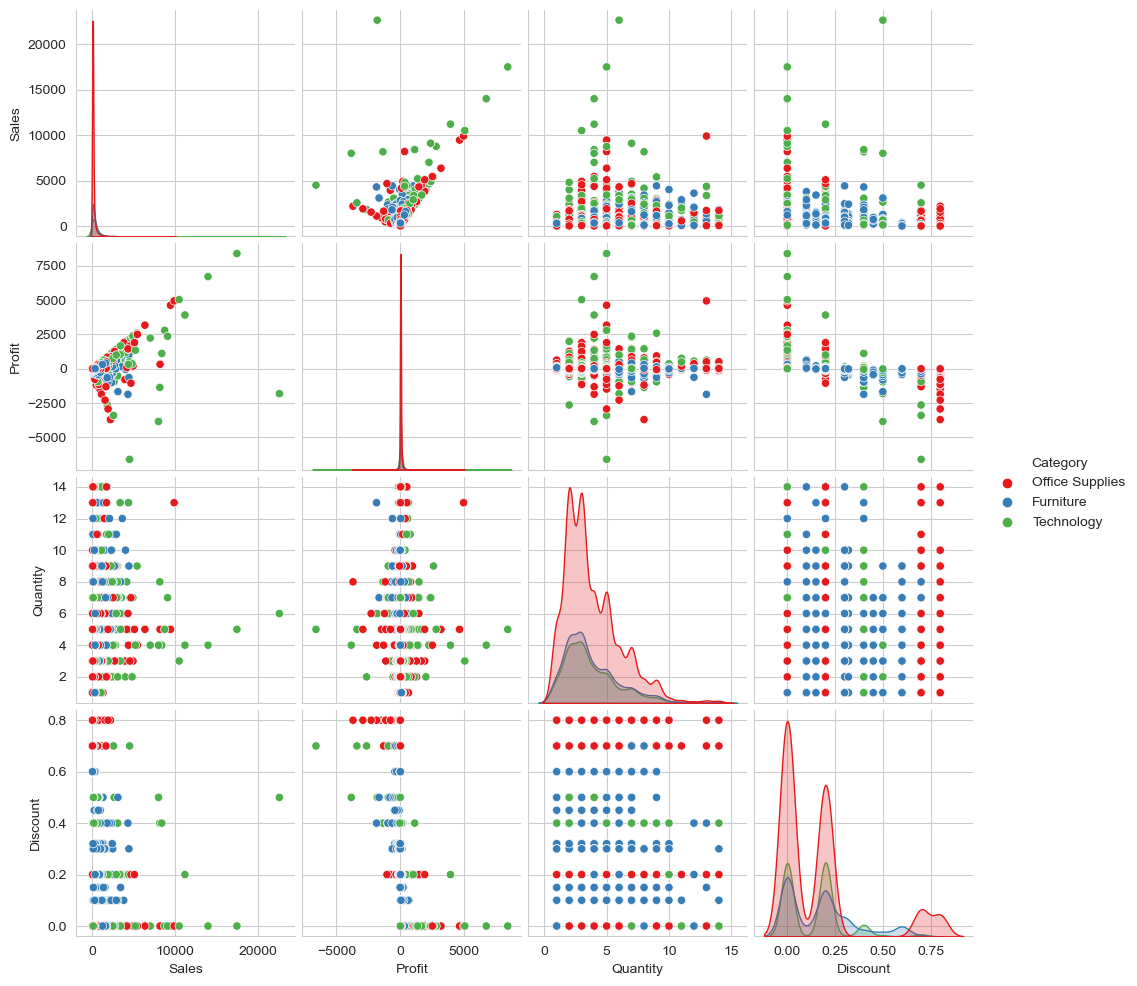

In [15]:
# a) Create a pair plot using seaborn for numerical columns
numerical_vars = ['Sales', 'Profit', 'Quantity', 'Discount']
sns.pairplot(df, vars=numerical_vars, hue='Category', palette='Set1')
plt.show()

#### b) Analysis
The pair plot provides a matrix of relationships. A key observation is the relationship between 'Discount' and 'Profit', which shows a clear negative trend: as the discount increases, profit tends to decrease, often becoming negative at higher discount levels. The relationship between 'Sales' and 'Profit' appears different for each category, with 'Technology' showing the strongest positive slope.

### 2. Joint Plot

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


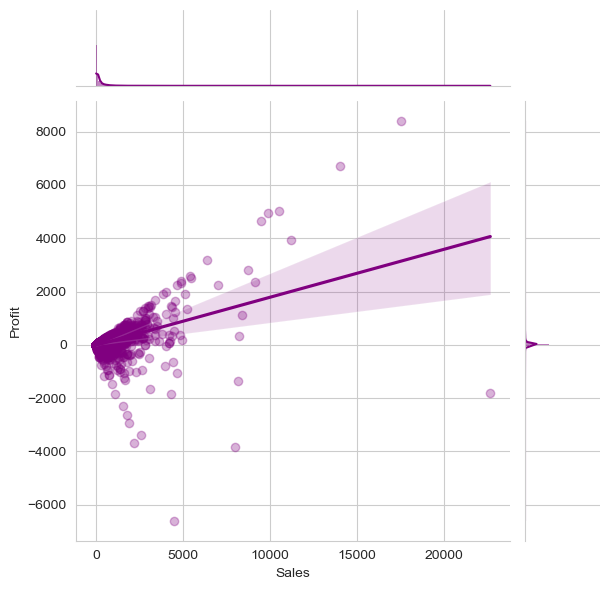

In [16]:
# a) Create a joint plot of Sales vs Profit
# Using kind='reg' adds both the scatter plot and a regression line
sns.jointplot(data=df, x='Sales', y='Profit', kind='reg', 
              color='purple', 
              joint_kws={'scatter_kws': {'alpha': 0.3}})

#### b) Analysis
The joint plot visualizes both the bivariate relationship and the univariate distributions. The central scatter plot, along with the regression line, confirms the positive correlation between Sales and Profit. The histograms on the top and right margins show that both variables are heavily skewed to the right, with most data points clustered at lower values.

### 3. Heatmap of Correlations

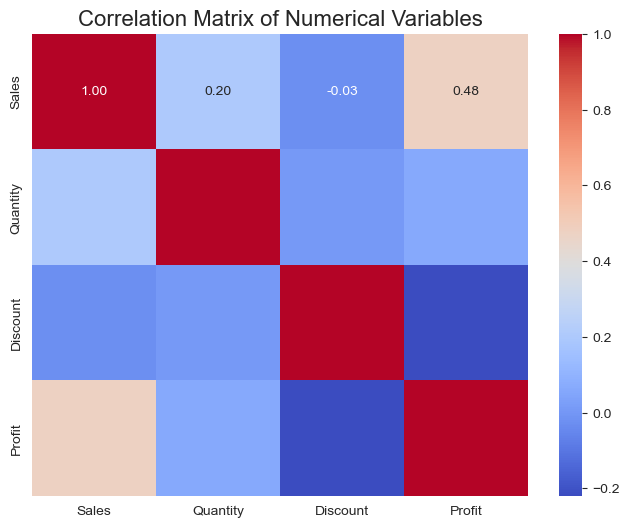

In [17]:
# a) Calculate correlation matrix for numerical columns
numerical_df = df[['Sales', 'Quantity', 'Discount', 'Profit']]
correlation_matrix = numerical_df.corr()

# b) Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.show()

#### c) Analysis
The heatmap clearly quantifies the relationships between numerical variables. The strongest positive correlation is between 'Sales' and 'Profit' (0.48), as observed earlier. The strongest negative correlation is between 'Discount' and 'Profit' (-0.22), reinforcing the insight that higher discounts significantly erode profitability. 'Quantity' shows very weak correlations with all other variables.